In [170]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from datetime import datetime
from collections import Counter
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns

### Obtaining All Names (gg)

In [73]:
#Web scraping the wikia for Genshin's playable character list.

urlnames_gg = "https://genshin.gg/"

pagenames_gg = requests.get(urlnames_gg)

soupname_gg = BeautifulSoup(pagenames_gg.text, "html.parser")

In [74]:
#Scraping through to get the html, identifying which class and identifier to find the names

imgtag_gg = soupname_gg.find_all("h2", class_= "character-name")
#imgtag_gg

In [75]:
characters_gg = [element.get_text() for element in imgtag_gg]
#characters

def process_names(names_list):
    return [name.replace(" ", "").lower() for name in names_list]

characters_gg = process_names(characters_gg)
characters_gg = sorted(characters_gg)

print(characters_gg)

['albedo', 'alhaitham', 'aloy', 'amber', 'ayaka', 'ayato', 'baizhu', 'barbara', 'beidou', 'bennett', 'candace', 'charlotte', 'chevreuse', 'childe', 'chiori', 'chongyun', 'collei', 'cyno', 'dehya', 'diluc', 'diona', 'dori', 'eula', 'faruzan', 'fischl', 'freminet', 'furina', 'gaming', 'ganyu', 'gorou', 'heizou', 'hutao', 'itto', 'jean', 'kaeya', 'kaveh', 'kazuha', 'keqing', 'kirara', 'klee', 'kokomi', 'kukishinobu', 'layla', 'lisa', 'lynette', 'lyney', 'mika', 'mona', 'nahida', 'navia', 'neuvillette', 'nilou', 'ningguang', 'noelle', 'qiqi', 'raiden', 'razor', 'rosaria', 'sara', 'sayu', 'shenhe', 'sucrose', 'thoma', 'tighnari', 'traveler(anemo)', 'traveler(dendro)', 'traveler(electro)', 'traveler(geo)', 'traveler(hydro)', 'venti', 'wanderer', 'wriothesley', 'xiangling', 'xianyun', 'xiao', 'xingqiu', 'xinyan', 'yaemiko', 'yanfei', 'yaoyao', 'yelan', 'yoimiya', 'yunjin', 'zhongli']


### Tidying Up Names

In [76]:
remove_gg = ["itto", "kazuha", "heizou", "sara", "childe", "ayato", "ayaka", "kokomi"]


characters_gg = [item for item in characters_gg if item not in remove_gg]
characters_gg = characters_gg + remove_gg
print(characters_gg)

['albedo', 'alhaitham', 'aloy', 'amber', 'baizhu', 'barbara', 'beidou', 'bennett', 'candace', 'charlotte', 'chevreuse', 'chiori', 'chongyun', 'collei', 'cyno', 'dehya', 'diluc', 'diona', 'dori', 'eula', 'faruzan', 'fischl', 'freminet', 'furina', 'gaming', 'ganyu', 'gorou', 'hutao', 'jean', 'kaeya', 'kaveh', 'keqing', 'kirara', 'klee', 'kukishinobu', 'layla', 'lisa', 'lynette', 'lyney', 'mika', 'mona', 'nahida', 'navia', 'neuvillette', 'nilou', 'ningguang', 'noelle', 'qiqi', 'raiden', 'razor', 'rosaria', 'sayu', 'shenhe', 'sucrose', 'thoma', 'tighnari', 'traveler(anemo)', 'traveler(dendro)', 'traveler(electro)', 'traveler(geo)', 'traveler(hydro)', 'venti', 'wanderer', 'wriothesley', 'xiangling', 'xianyun', 'xiao', 'xingqiu', 'xinyan', 'yaemiko', 'yanfei', 'yaoyao', 'yelan', 'yoimiya', 'yunjin', 'zhongli', 'itto', 'kazuha', 'heizou', 'sara', 'childe', 'ayato', 'ayaka', 'kokomi']


### Scraping Constellation Data

In [6]:
#Web Scraping Constellation Data from Genshin.gg - Complete

characters_gg_test = characters_gg[2:5]
cons_full = []

for names in characters_gg_test:
    
    url_chara_gg = "https://genshin.gg/characters/"+names+"/"
    page_chara_gg = requests.get(url_chara_gg)
    soup_chara_gg = BeautifulSoup(page_chara_gg.content, "html.parser")
 

    #Obtaining the constellation html info
    
    if soup_chara_gg.find("div", id='constellations') != None:
        cons1 = soup_chara_gg.find("div", id="constellations").find_all("div", class_="character-skill-description")
        cons2 = [con.get_text() for con in cons1]
        cons2 = " ".join(cons2)
        #print(cons2)
        cons_full.append(cons2)
    
    else:
        #print("No Constellations")
        notext = "This character has no constellations."
        cons_full.append(notext)

In [7]:
#cons_full

# Data Preprocessing, with g8 instead of wk

In [77]:
url_g8 = "https://game8.co/games/Genshin-Impact/archives/307054"

In [78]:
#page_chara_g8 = requests.get(url_g8)
#soup_chara_g8 = BeautifulSoup(page_chara_g8.content, "html.parser")
#soup_chara_g8.find_all("a")
#pandas_table_g8[9]

In [79]:
#Using the Built-in Pandas html reader

pandas_table_g8 = pd.read_html(url_g8)

# COMPLETE NAME SCRAPING WITH RELEASE DATES

In [80]:
url_g8 = "https://game8.co/games/Genshin-Impact/archives/307054"


#Using the Built-in Pandas html reader
pandas_table_g8 = pd.read_html(url_g8)

dates_full_g8 = pandas_table_g8[7]        #Selecting the correct table with the release date from the scrape

#Removing the irrelevant data
dates_full_g8 = dates_full_g8.drop(columns = ['Element'])
dates_full_g8 = dates_full_g8.dropna()

#Sorting values
dates_full_g8 = dates_full_g8.sort_values(by = ["Character"], axis = 0)
dates_full_g8.reset_index(drop=True, inplace=True)


#Fixing Aloy, Childe, and Kuki Shinobu: specific characters with issues that need to be processed manually
#with the naming and release date conventions
dates_full_g8.loc[2, 'Release Date'] = "10/13/2021"
dates_full_g8.loc[44, 'Character'] = "childe"
dates_full_g8 = dates_full_g8.drop(dates_full_g8[dates_full_g8['Character'] == "Shinobu"].index)

#print(dates_full_g8)




#Fixing Rarity Tag
dates_full_g8['Rarity'] = dates_full_g8['Rarity'].str.replace(r'★ (\d+)', r'\1star', regex=True)    #use Regex

#Fixing Release Date
dates_full_g8['Release Date'] = pd.to_datetime(dates_full_g8['Release Date'])

#print(dates_full_g8)



#Converting character names into simpler format and obtaining information on missing ("Day One") Characters
characters_g8 = dates_full_g8['Character'].tolist()
characters_g8 = [x.lower() for x in characters_g8]        #Similar to previous action with gg
characters_g8 = process_names(characters_g8)              #Use Previous function to remove spaces

#print(len(characters_g8))
#print(characters_g8)



#Listing out Missing Characters, comparing complete set FROM gg and the incomplete from g8
characters_gg_g8 = list(set(characters_gg) - set(characters_g8))

#print(characters_gg_g8)



#Isolating Day 1 Characters into g8
characters_gg_g8 = list(set(characters_gg_g8) - set('kukishinobu'))    #kukishinobu will be added back later

#print(characters_gg_g8)



#Creating 5star (legendary) and 4star (epic) dataframes for concatenation
Legendary = ['diluc', 'jean', 'traveler(geo)', 'traveler(electro)', 
             'traveler(hydro)','traveler(anemo)', 'traveler(dendro)', 
             'qiqi', 'mona', 'keqing']
Epic = list(set(characters_gg_g8) - set(Legendary))        #Manual action is listing Day One Legendary characters



#Converting Epic list into DataFrame
df_Epic = pd.DataFrame(Epic, columns=['Character'])
df_Epic['Rarity'] = '4star'
df_Epic['Release Date'] = '2020/9/28'
df_Epic['Release Date'] = pd.to_datetime(df_Epic['Release Date'])

kuki = pd.DataFrame([{'Character': 'kukishinobu',         #Adding back kukishinobu manually
                      'Rarity': '4star', 
                      'Release Date': '21/6/2022'}])
kuki['Release Date'] = pd.to_datetime(kuki['Release Date'])


df_Epic = pd.concat([df_Epic, kuki])
df_Epic.reset_index(drop = True, inplace = True)

#print(df_Epic)



#Converting Legendary list into DataFrame
df_Legend = pd.DataFrame(Legendary, columns=['Character'])
df_Legend['Rarity'] = '5star'
df_Legend['Release Date'] = '2020/9/28'
df_Legend['Release Date'] = pd.to_datetime(df_Epic['Release Date'])

#print(df_Legend)



#Combining the 5s and 4s dataframes for the Day One Characters (and kukishinobu)
df_Day1 = pd.concat([df_Epic, df_Legend])
df_Day1.reset_index(drop = True, inplace = True)

#print(df_Day1)



#Combining the Day One Characters with the Initial dates_full_g8 Frame
dates_full_g8 = pd.concat([dates_full_g8, df_Day1])
dates_full_g8.reset_index(inplace = True, drop = True)

In [81]:
print(len(dates_full_g8))
dates_full_g8

85


,Release Date,Character,Rarity
0,2020-12-23,Albedo,5star
1,2023-01-18,Alhaitham,5star
2,2021-10-13,Aloy,5star
3,2021-07-01,Ayaka,5star
4,2022-03-30,Ayato,5star
5,2023-05-02,Baizhu,5star
6,2022-09-28,Candace,4star
7,2023-11-08,Charlotte,4star
8,2024-01-09,Chevreuse,4star
9,2024-03-13,Chiori,5star


In [82]:
characters_g8 = dates_full_g8['Character'].tolist()
characters_g8 = [x.lower() for x in characters_g8]
characters_g8 = process_names(characters_g8)

#print(len(characters_g8))
#characters_g8

In [83]:
#Web Scraping Constellation Data from Genshin.gg - Complete

characters_gg_test = characters_g8#[0:60]
cons_full_g8 = []

for names in characters_gg_test:
    
    url_chara_gg = "https://genshin.gg/characters/"+names+"/"
    page_chara_gg = requests.get(url_chara_gg)
    soup_chara_gg = BeautifulSoup(page_chara_gg.content, "html.parser")
 

    #Obtaining the constellation html info
    
    if soup_chara_gg.find("div", id='constellations') != None:
        cons1 = soup_chara_gg.find("div", id="constellations").find_all("div", class_="character-skill-description")
        cons2 = [con.get_text() for con in cons1]
        cons2 = " ".join(cons2)
        #print(cons2)
        cons_full_g8.append(cons2)
    
    else:
        #print("No Constellations")
        notext = "This character has no constellations."
        cons_full_g8.append(notext)

In [88]:
len(cons_full_g8)

#cons_full_g8
#dates_full_g8

85

In [163]:
#Note: Set limit as desired
pd.set_option('display.max_rows', 10)
dates_full_g8['Constellation Description'] = cons_full_g8


#Renaming into new DF
DF_FULL = dates_full_g8
#DF_FULL['Character'] = DF_FULL['Character'].apply(process_names)
DF_FULL

,Release Date,Character,Rarity,Constellation Description,Word Count
0,2020-12-23,Albedo,5star,Transient Blossoms generated by Albedo's Abiog...,141
1,2023-01-18,Alhaitham,5star,"When a Projection Attack hits an opponent, Uni...",252
2,2021-10-13,Aloy,5star,This character has no constellations.,5
3,2021-07-01,Ayaka,5star,When Kamisato Ayaka's Normal or Charged Attack...,138
4,2022-03-30,Ayato,5star,Shunsuiken DMG is increased by 40% against opp...,121
...,...,...,...,...,...
80,2020-09-28,traveler(anemo),5star,Palm Vortex pulls in enemies within a 5m radiu...,80
81,2020-09-28,traveler(dendro),5star,"After Razorgrass Blade hits an opponent, it wi...",126
82,2020-09-28,qiqi,5star,When the Herald of Frost hits an enemy marked ...,102
83,2020-09-28,mona,5star,The effects of Hydro-related Elemental Reactio...,165


In [90]:
#Generating a simple word count from the constellation descriptions.

List_count_g8 = []

for paragraph in cons_full_g8:
    words = paragraph.split()
    word_count = sum(Counter(words).values())
    List_count_g8.append(word_count)

print(List_count_g8)
len(List_count_g8)

[141, 252, 5, 138, 121, 167, 143, 196, 224, 303, 205, 255, 242, 136, 160, 121, 180, 123, 338, 116, 146, 193, 155, 188, 164, 121, 149, 219, 125, 175, 230, 100, 149, 172, 234, 240, 236, 183, 171, 96, 111, 193, 135, 143, 110, 149, 119, 271, 358, 263, 106, 109, 106, 102, 201, 155, 135, 84, 106, 106, 92, 93, 120, 116, 66, 142, 111, 112, 117, 145, 108, 129, 111, 86, 145, 139, 110, 124, 123, 180, 80, 126, 102, 165, 137]


85

In [164]:
DF_FULL['Word Count'] = List_count_g8
DF_FULL

,Release Date,Character,Rarity,Constellation Description,Word Count
0,2020-12-23,Albedo,5star,Transient Blossoms generated by Albedo's Abiog...,141
1,2023-01-18,Alhaitham,5star,"When a Projection Attack hits an opponent, Uni...",252
2,2021-10-13,Aloy,5star,This character has no constellations.,5
3,2021-07-01,Ayaka,5star,When Kamisato Ayaka's Normal or Charged Attack...,138
4,2022-03-30,Ayato,5star,Shunsuiken DMG is increased by 40% against opp...,121
...,...,...,...,...,...
80,2020-09-28,traveler(anemo),5star,Palm Vortex pulls in enemies within a 5m radiu...,80
81,2020-09-28,traveler(dendro),5star,"After Razorgrass Blade hits an opponent, it wi...",126
82,2020-09-28,qiqi,5star,When the Herald of Frost hits an enemy marked ...,102
83,2020-09-28,mona,5star,The effects of Hydro-related Elemental Reactio...,165


## Plots (no discrimination)

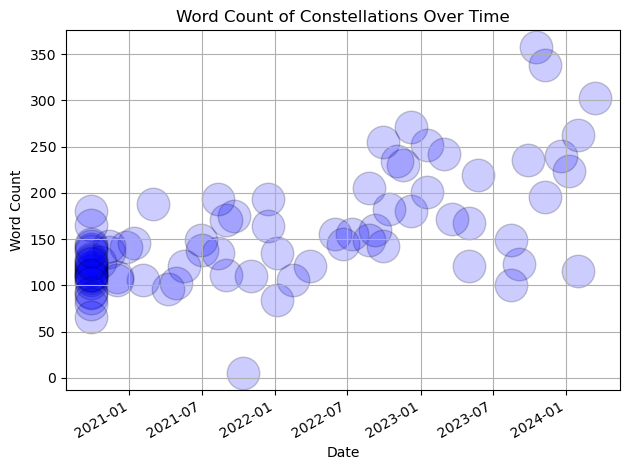

In [92]:
#Creating plots with the new data frame.

DF_FULL.plot.scatter(x='Release Date', y = 'Word Count', color = 'blue',
                 marker = 'o', edgecolor = 'black', alpha = 0.20, s=550)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Word Count')
plt.title('Word Count of Constellations Over Time')

# Formatting x-axis ticks as dates
plt.xticks(rotation=30, ha='right')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

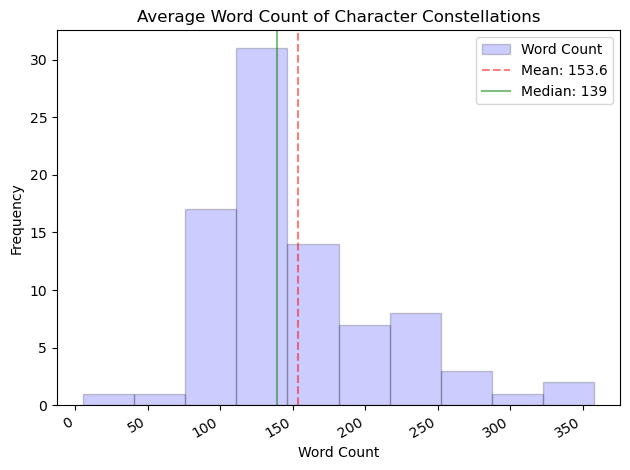

In [123]:
#Histogram of Frequency of "Word Count:" Average Word Count of Character Constellations

DF_FULL.plot.hist(y='Word Count', color='blue', edgecolor='black', alpha = 0.20)

#Calculate Mean and Median
mean_stat = DF_FULL['Word Count'].mean()
median_stat = DF_FULL['Word Count'].median()

plt.axvline(x=mean_stat, color = 'red', linestyle = '--', 
            label = f'Mean: {round(mean_stat, 1)}', alpha = 0.5)
plt.axvline(x=median_stat, color = 'green', linestyle = '-', 
            label = f'Median: {round(median_stat)}', alpha = 0.5)


#Adding labels and title
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Average Word Count of Character Constellations')
plt.legend()

#Formatting x-axis ticks as dates
plt.xticks(rotation=30, ha='right')

#Display the plot
plt.tight_layout()
plt.show()

## Grouping by Rarity

In [93]:
#Summary Statistics according to character rarity

test = DF_FULL.groupby('Rarity')
display(test.mean())

,Word Count
Rarity,
4star,136.950000
5star,168.333333


In [94]:
#Splitting original dataframe into a list, and then converting the list into a pd.DataFrame

Rarity = DF_FULL.groupby('Rarity')
Rarity_grouped = [group_df for _, group_df in Rarity]
df_Epic_2, df_Legendary_2 = Rarity_grouped

In [160]:
df_Epic_2.reset_index(inplace = True, drop = True)
df_Legendary_2.reset_index(inplace = True, drop = True)

#display(df_Epic_2)
#display(df_Legendary_2)

## Scatter Plots (with discrimination)

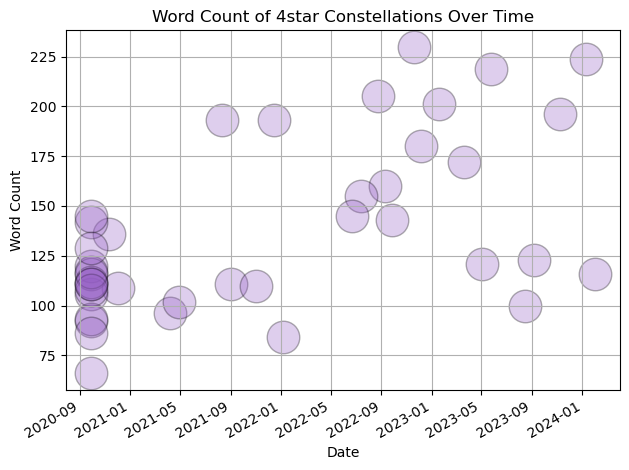

In [127]:
#Creating plots for Epic Rarities

df_Epic_2.plot.scatter(x = 'Release Date', y = 'Word Count', color='#945dc4',
                 marker = 'o', edgecolor = 'black', alpha = 0.30, s = 550)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Word Count')
plt.title('Word Count of 4star Constellations Over Time')

# Formatting x-axis ticks as dates
plt.xticks(rotation=30, ha='right')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

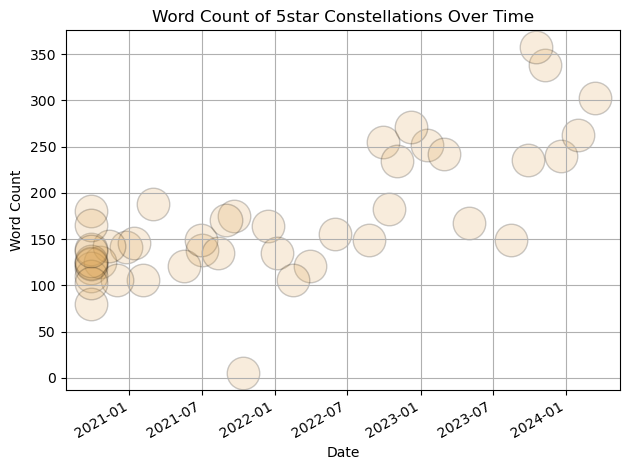

In [129]:
#Creating plots for Legendary Rarities

df_Legendary_2.plot.scatter(x = 'Release Date', y = 'Word Count', color = '#dca454',
                 marker = 'o', edgecolor = 'black', alpha = 0.20, s = 550)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Word Count')
plt.title('Word Count of 5star Constellations Over Time')

# Formatting x-axis ticks as dates
plt.xticks(rotation=30, ha='right')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

#Creating Subplot

fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 4))


#4 Star
X0 = df_Epic_2['Release Date']
Y0 = df_Epic_2['Word Count']

ax[0].set_title('4 Star')
ax[0].scatter(X0, Y0, color = '#945dc4', marker = 'o', edgecolor = 'black', alpha = 0.20, s = 550)

#Formatting x-axis ticks as dates
#ax[0].set_xticks(X0)
#ax[0].set_xticklabels(X0, rotation=30, ha='right')

#Display the plot
#ax[0].grid(True)


#5 Star
X1 = df_Legendary_2['Release Date']
Y1 = df_Legendary_2['Word Count']

ax[1].set_title('5 Star')
ax[1].scatter(X1, Y1, color = '#dca454', marker = 'o', edgecolor = 'black', alpha = 0.20, s = 550)

#Formatting x-axis ticks as dates
#ax[1].set_xticks(X1)
#ax[1].set_xticklabels(X1, rotation=30, ha='right')

#Display the plot
#ax[1].grid(True)

# Insight: word frequency distribution

In [262]:
pd.set_option('display.max_rows', 10)

In [263]:
df_Epic_2

,Release Date,Character,Rarity,Constellation Description,Word Count
0,2022-09-28,Candace,4star,The duration of Prayer of the Crimson Crown ef...,143
1,2023-11-08,Charlotte,4star,After Still Photo: Comprehensive Confirmation ...,196
2,2024-01-09,Chevreuse,4star,"When the active character with the ""Coordinate...",224
3,2022-08-24,Collei,4star,"When in the party and not on the field, Collei...",205
4,2020-11-11,Diona,4star,Regenerates 15 Energy for Diona after the effe...,136
...,...,...,...,...,...
35,2020-09-28,sucrose,4star,Astable Anemohypostasis Creation - 6308 gains ...,108
36,2020-09-28,fischl,4star,"Even when Oz is not present in combat, he can ...",129
37,2020-09-28,bennett,4star,Fantastic Voyage's ATK increases no longer has...,111
38,2020-09-28,beidou,4star,When Stormbreaker is used: Creates a shield th...,86


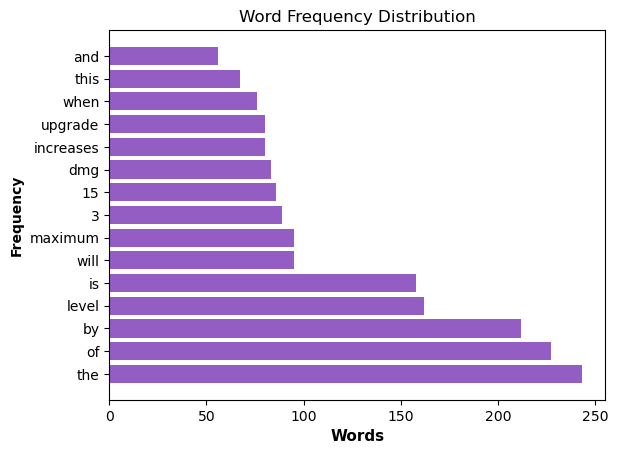

In [272]:
#Aggregating all 4 stars into one paragraph.
Epic_cons_all = ' '.join(df_Epic_2['Constellation Description'])

#Cleaning the paragraph
testing1 = Epic_cons_all.replace(".", "").replace('(', "").replace(')', "")
#testing1

#Splitting paragraphs by word
testing2 = testing1.lower().split()
#testing2

#Making a word count and distribution
testing3 = Counter(testing2).most_common(15)        #Note: Choose the top frequencies as desired
#testing3

#Converting into usable DataFrame
testing4 = pd.DataFrame(testing3, columns=['Word', 'Frequency'])
#testing4[4:10]

#Plotting into bar chart
plt.barh(testing4['Word'], testing4['Frequency'], color = "#945dc4")

plt.xlabel('Words', fontsize = 11, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold')

plt.title('Word Frequency Distribution')
plt.xticks(rotation=0, fontsize = 10)

plt.show()

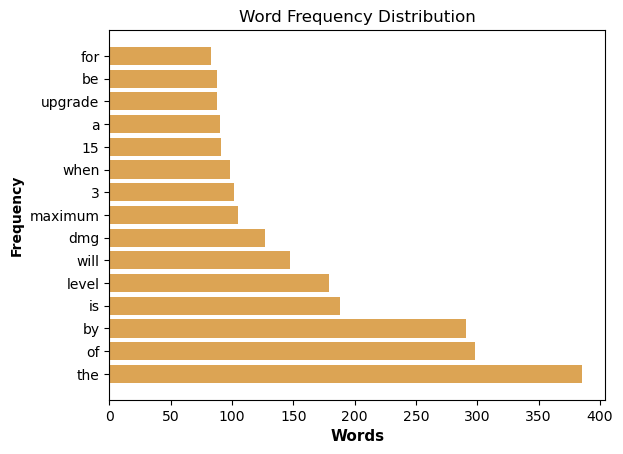

In [271]:
#Aggregating all 5 stars into one paragraph.
Legendary_cons_all = ' '.join(df_Legendary_2['Constellation Description'])

#Cleaning the paragraph
testing1 = Legendary_cons_all.replace(".", "").replace('(', "").replace(')', "")
#testing1

#Splitting paragraphs by word
testing2 = testing1.lower().split()
#testing2

#Making a word count and distribution
testing3 = Counter(testing2).most_common(15)        #Note: Choose the top frequencies as desired
#testing3

#Converting into usable DataFrame
testing4 = pd.DataFrame(testing3, columns=['Word', 'Frequency'])
#testing4[4:10]

#Plotting into bar chart
plt.barh(testing4['Word'], testing4['Frequency'], color = "#dca454")

plt.xlabel('Words', fontsize = 11, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold')

plt.title('Word Frequency Distribution')
plt.xticks(rotation=0, fontsize = 10)

plt.show()

In [267]:
#test = Epic_cons_all.lower()
#test = test.split()


#Cleaning paragraphs
#Epic_Cons_all = Epic_cons_all.replace("\\", "")
#Epic_Cons_all


#Counting Distribution
#test_count = Counter(test)                #Use Counter lib
#test_list = test_count.most_common()

In [214]:
#Cleaning the paragraph

testing1 = Epic_cons_all.replace(".", "").replace('(', "").replace(')', "")
#testing1

In [215]:
#testing2 = testing1.replace('(', "")
#testing2 = testing2.replace(')', "")

testing2 = testing1.lower().split()
testing2

In [227]:
#Making a word count and distribution
testing3 = Counter(testing2).most_common(15)        #Note: Choose the top frequencies as desired
testing3

[('the', 243),
 ('of', 227),
 ('by', 212),
 ('level', 162),
 ('is', 158),
 ('will', 95),
 ('maximum', 95),
 ('3', 89),
 ('15', 86),
 ('dmg', 83),
 ('increases', 80),
 ('upgrade', 80),
 ('when', 76),
 ('this', 67),
 ('and', 56)]

In [232]:
#Creating DataFrame
testing4 = pd.DataFrame(testing3, columns=['Word', 'Frequency'])
testing4#[4:10]

,Word,Frequency
0,the,243
1,of,227
2,by,212
3,level,162
4,is,158
...,...,...
10,increases,80
11,upgrade,80
12,when,76
13,this,67


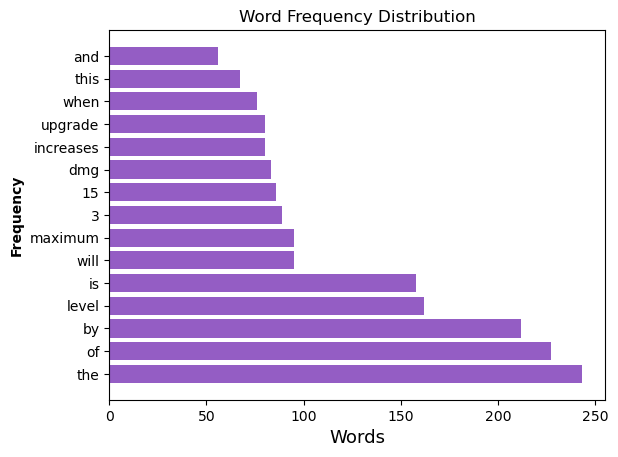

In [259]:
plt.barh(testing4['Word'], testing4['Frequency'], color = "#945dc4")

plt.xlabel('Words', fontsize = 13)
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold')

plt.title('Word Frequency Distribution')
plt.xticks(rotation=0, fontsize = 10)

plt.show()

In [238]:
testing4

,Word,Frequency
0,the,243
1,of,227
2,by,212
3,level,162
4,is,158
5,will,95
6,maximum,95
7,3,89
8,15,86
9,dmg,83
